MAE: 4067.05
MSE: 24361738.64
R2: -0.01


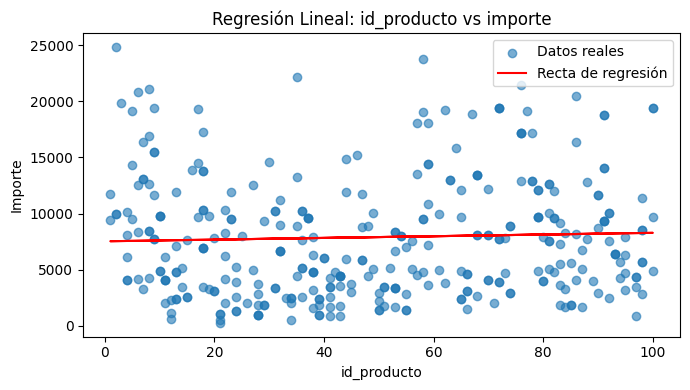

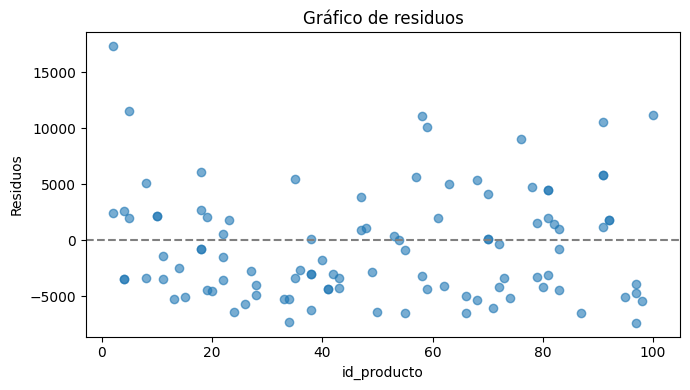

In [5]:
# =========================================
# 1️⃣ Librerías
# =========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# =========================================
# 2️⃣ Cargar datos reales
# =========================================
detalle = pd.read_excel("detalle_ventas.xlsx")

# Validar columnas necesarias
detalle["id_producto"] = pd.to_numeric(detalle["id_producto"], errors="coerce")
detalle["importe"] = pd.to_numeric(detalle["importe"], errors="coerce")

# Eliminar nulos
df = detalle.dropna(subset=["id_producto", "importe"])

# =========================================
# 3️⃣ Variables
# =========================================
X = df[["id_producto"]]      # variable predictora
y = df["importe"]         # variable a predecir

# =========================================
# 4️⃣ División Train/Test
# =========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# =========================================
# 5️⃣ Entrenamiento del Modelo
# =========================================
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# =========================================
# 6️⃣ Predicción
# =========================================
y_pred = modelo.predict(X_test)

# =========================================
# 7️⃣ Métricas
# =========================================
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("R2:", round(r2, 2))

# =========================================
# 8️⃣ Gráfico: Predicciones vs Reales
# =========================================
plt.figure(figsize=(7,4))
plt.scatter(df["id_producto"], df["importe"], label="Datos reales", alpha=0.6)
plt.plot(X, modelo.predict(X), label="Recta de regresión", color="red")
plt.xlabel("id_producto")
plt.ylabel("Importe")
plt.title("Regresión Lineal: id_producto vs importe")
plt.legend()
plt.tight_layout()
plt.show()

# =========================================
# 9️⃣ Gráfico: residuos
# =========================================
residuos = y_test - y_pred

plt.figure(figsize=(7,4))
plt.scatter(X_test, residuos, alpha=0.6)
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("id_producto")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos")
plt.tight_layout()
plt.show()